## C Integration Examples

Notes:

- SwiftSox package requires sox to be installed: `sudo apt install libsox-dev libsox-fmt-all sox`
- SwiftVips package requires vips to be installed: see `SwiftVips/install.sh` for steps

In [ ]:
%install-extra-include-command pkg-config --cflags vips
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SwiftVips")' SwiftVips
%install '.package(path: "$cwd/SwiftSox")' SwiftSox
%install '.package(path: "$cwd/FastaiNotebook_08_data_block")' FastaiNotebook_08_data_block

Installing packages:
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/SwiftVips")
		SwiftVips
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/SwiftSox")
		SwiftSox
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/FastaiNotebook_08_data_block")
		FastaiNotebook_08_data_block
With SwiftPM flags: []
Working in: /tmp/tmpbgmplts5/swift-install
/home/jhoward/swift/usr/bin/swift-build: /home/jhoward/anaconda3/lib/libuuid.so.1: no version information available (required by /home/jhoward/swift/usr/lib/swift/linux/libFoundation.so)
/home/jhoward/swift/usr/bin/swift-build: /home/jhoward/anaconda3/lib/libcurl.so.4: no version information available (required by /home/jhoward/swift/usr/lib/swift/linux/libFoundation.so)
Updating https://github.com/latenitesoft/NotebookExport
Updating https://github.com/JustHTTP/Just
Updating https://github.com/mxcl/Path.swift
Completed resolution in 4.94s
/home/jhoward/swift/usr/bin/swiftc: /home/jhoward/anaconda3/lib/libuuid.so.1: no version

In [ ]:
import Foundation
import Path
import FastaiNotebook_08_data_block

### Sox

In [ ]:
import sox

In [ ]:
public func InitSox() {
  if sox_format_init() != SOX_SUCCESS.rawValue { fatalError("Can not init SOX!") }
}

public func ReadSoxAudio(_ name:String)->UnsafeMutablePointer<sox_format_t> {
  return sox_open_read(name, nil, nil, nil)
}

In [ ]:
InitSox()

In [ ]:
let fd = ReadSoxAudio("SwiftSox/sounds/chris.mp3")

In [ ]:
let sig = fd.pointee.signal

In [ ]:
(sig.rate,sig.precision,sig.channels,sig.length)

▿ 4 elements
  - .0 : 44100.0
  - .1 : 16
  - .2 : 1
  - .3 : 58741


In [ ]:
var samples = [Int32](repeating: 0, count: numericCast(sig.length))

In [ ]:
sox_read(fd, &samples, numericCast(sig.length))

57600


In [ ]:
import Python

In [ ]:
%include "EnableIPythonDisplay.swift"
let plt = Python.import("matplotlib.pyplot")
let np = Python.import("numpy")
let display = Python.import("IPython.display")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [ ]:
let t = samples.makeNumpyArray()

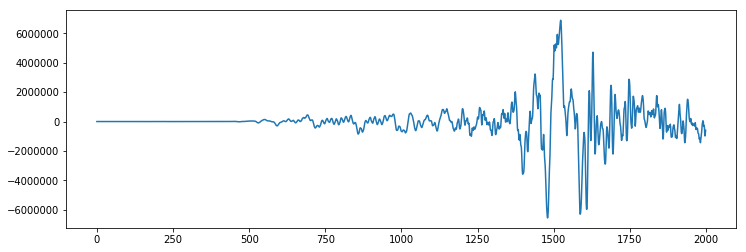

None


In [ ]:
plt.figure(figsize: [12, 4])
plt.plot(t[2000..<4000])
plt.show()

In [ ]:
display.Audio(t, rate:sig.rate).display()

So here we're using numpy, matplotlib, ipython, all from swift! 😎

Why limit ourselves to Python? There's a lot out there that's not in Python yet!

[next slide](https://docs.google.com/presentation/d/1dc6o2o-uYGnJeCeyvgsgyk05dBMneArxdICW5vF75oU/edit#slide=id.g512a2e238a_144_16)

### Vips

In [ ]:
import TensorFlow
import SwiftVips
import CSwiftVips
import vips

In [ ]:
vipsInit()

In [ ]:
let path = downloadImagenette()
let allNames = fetchFiles(path: path/"train", recurse: true, extensions: ["jpeg", "jpg"])
let fNames = Array(allNames[0..<256])
let ns = fNames.map {$0.string}

In [ ]:
let imgpath = ns[0]
let img = vipsLoadImage(imgpath)!

In [ ]:
func vipsToTensor(_ img:Image)->Tensor<UInt8> {
    var sz = 0
    let mem = vipsGet(img, &sz)
    defer {free(mem)}
    let shape = TensorShape(vipsShape(img))
    return Tensor(shape: shape, scalars: UnsafeBufferPointer(start: mem, count: sz))
}

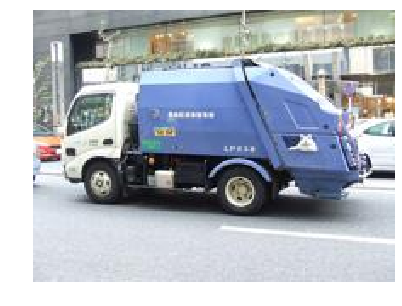

In [ ]:
show_img(vipsToTensor(img))

## fin